# Prepare Lesson

## Exercise

The end result of this exercise should be a file named prepare.py.

### Using your store items data:


In [126]:
import pandas as pd
import os
from env import user, password, host

In [127]:
def get_sql(
    user=user,
    password=password,
    host=host,
    filename="store.csv",
    database="tsa_item_demand",
):
    """
    This function acquires data from a SQL database and caches it locally, or uses the already cached file.

    :param user: The username for accessing the MySQL database
    :param password: The password is unique per user saved in env
    :param host: The host parameter is the address of the server where the database is hosted
    :return: The function `get_sql` is returning a pandas DataFrame
    """
    # if cached data exists
    if os.path.isfile(filename):
        # read data from cached csv
        df = pd.read_csv(filename)
        # Print size
        print(f"Total rows: {df.shape[0]}")
        print(f"Total columns: {df.shape[1]}")
    # wrangle from sql db if not cached
    else:
        # read sql query into df
        df = pd.read_sql(
            """
                SELECT * FROM sales
                JOIN items ON sales.item_id = items.item_id
                JOIN stores ON sales.store_id = stores.store_id;
                """,
            f"mysql+pymysql://{user}:{password}@{host}/{database}",
        )
        # cache data locally
        df.to_csv(filename, index=False)
        # print total rows and columns
        print(f"Total rows: {df.shape[0]}")
        print(f"Total columns: {df.shape[1]}")
    return df


def check_columns(df, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, the proportion of null values,
    the data type of the column, and the range of the column if it is float or int. The resulting dataframe is sorted by the
    'Number of Unique Values' column in ascending order.

    Args:
    - df: pandas dataframe

    Returns:
    - pandas dataframe
    """
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    if reports == True:
        describe = df.describe().round(2)
        pd.DataFrame(describe)
        print(describe)
    if graphs == True:
        df.hist(bins=20, figsize=(10, 10))
        plt.show()
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, proportion of null values, and data type to the data list
        if df[column].dtype in ["float64", "int64"]:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    df[column].describe()[["min", "max", "mean"]].values,
                ]
            )
        else:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    None,
                ]
            )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', 'Proportion of Null Values', 'dtype', and 'Range' (if column is float or int)
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [128]:
store = get_sql()

Total rows: 913000
Total columns: 16


In [157]:
check_columns(store)

Total rows: 913000
Total columns: 16


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,sale_id,int64,913000,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 913000.0, 456500.5]"
1,sale_date,object,1826,0,0.0,"[2013-01-01, 2013-01-02, 2013-01-03, 2013-01-0...",None
2,store_id,int64,10,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[1.0, 10.0, 5.5]"
3,item_id,int64,50,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 50.0, 25.5]"
4,sale_amount,int64,213,0,0.0,"[13, 11, 14, 10, 12, 9, 7, 5, 16, 18, 15, 8, 6...","[0.0, 231.0, 52.250286966046005]"
5,item_id.1,int64,50,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 50.0, 25.5]"
6,item_upc14,int64,50,0,0.0,"[35200264013, 11111065925, 23923330139, 208528...","[8500004528.0, 884623708976.0, 238468784491.03..."
7,item_upc12,int64,50,0,0.0,"[35200264013, 11111065925, 23923330139, 208528...","[8500004528.0, 884623708976.0, 238468784491.03..."
8,item_brand,object,49,0,0.0,"[Riceland, Caress, Earths Best, Boars Head, Ba...",None
9,item_name,object,50,0,0.0,"[Riceland American Jazmine Rice, Caress Velvet...",None



#### 1. 
Convert date column to datetime format.


In [160]:
# Remove the timezone information
store["sale_date"] = store["sale_date"].str.replace(" 00:00:00 GMT", "")
store["sale_date"] = store["sale_date"].str.strip()

# Convert column
store["sale_date"] = pd.to_datetime(store["sale_date"])
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_id        913000 non-null  int64         
 1   sale_date      913000 non-null  datetime64[ns]
 2   store_id       913000 non-null  int64         
 3   item_id        913000 non-null  int64         
 4   sale_amount    913000 non-null  int64         
 5   item_id.1      913000 non-null  int64         
 6   item_upc14     913000 non-null  int64         
 7   item_upc12     913000 non-null  int64         
 8   item_brand     913000 non-null  object        
 9   item_name      913000 non-null  object        
 10  item_price     913000 non-null  float64       
 11  store_id.1     913000 non-null  int64         
 12  store_address  913000 non-null  object        
 13  store_zipcode  913000 non-null  int64         
 14  store_city     913000 non-null  object        
 15  

#### 2. 
Plot the distribution of sale_amount and item_price.


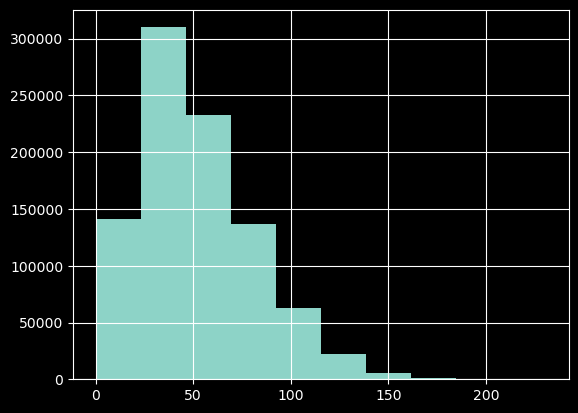

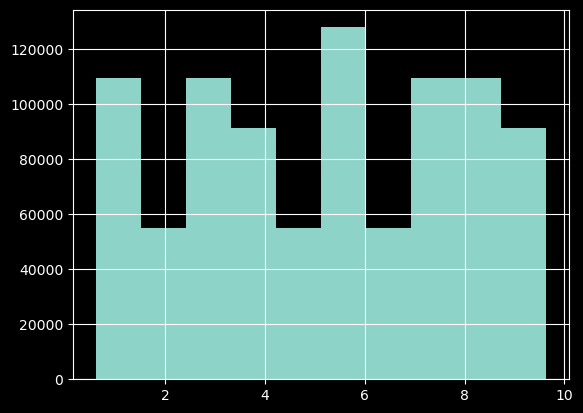

In [165]:
import matplotlib.pyplot as plt

store["sale_amount"].hist()
plt.show()

store["item_price"].hist()
plt.show()

#### 3. 
Set the index to be the datetime variable.


In [167]:
store = store.set_index("sale_date").sort_index()

In [169]:
store.head(1)

,sale_id,store_id,item_id,sale_amount,item_id.1,item_upc14,item_upc12,item_brand,item_name,item_price,store_id.1,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


#### 4. 
Add a 'month' and 'day of week' column to your dataframe.


In [170]:
store["month"] = store.index.month

store["day_of_week"] = store.index.day_of_week

In [177]:
store.sample(5)

,sale_id,store_id,item_id,sale_amount,item_id.1,item_upc14,item_upc12,item_brand,item_name,item_price,store_id.1,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2017-01-01,129282,1,8,65,8,51600080015,51600080015,Lea & Perrins,Lea & Perrins Marinade In-a-bag Cracked Pepper...,1.68,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,6
2013-01-15,869191,7,48,15,48,79400271631,79400271631,Dove,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,7,12018 Perrin Beitel Rd,78217,San Antonio,TX,1,1
2016-01-11,326134,9,18,57,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,9,735 SW Military Dr,78221,San Antonio,TX,1,0
2014-07-10,639656,1,36,101,36,610358991525,610358991525,Deerfields Gluten Free,Rice Bran Gluten Free Dinner Rolls Plain,7.95,1,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,7,3
2017-12-26,657355,10,36,57,36,610358991525,610358991525,Deerfields Gluten Free,Rice Bran Gluten Free Dinner Rolls Plain,7.95,10,8503 NW Military Hwy,78231,San Antonio,TX,12,1


#### 5. 
Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


In [179]:
store["sales_total"] = store["sale_amount"] * store["item_price"]

#### 6. 
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [ ]:
def prep_store(store):
    """
    This function prepares the store data by removing timezone information, converting the sale_date column to a
    datetime index, and adding columns for month and day of the week.

    Parameters:
    store (pandas.DataFrame): The store data to be prepared.

    Returns:
    pandas.DataFrame: The prepared store data.
    """
    # Remove the timezone information
    store["sale_date"] = store["sale_date"].str.replace(" 00:00:00 GMT", "")
    store["sale_date"] = store["sale_date"].str.strip()

    # Convert column
    store["sale_date"] = pd.to_datetime(store["sale_date"])

    # Set index and sort by date
    store = store.set_index("sale_date").sort_index()

    # Add columns for month and day of the week
    store["month"] = store.index.month
    store["day_of_week"] = store.index.day_of_week

    # Get the total value of the sale
    store["sales_total"] = store["sale_amount"] * store["item_price"]

    return store

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [129]:
from acquire import get_opsd

In [130]:
opsd = get_opsd()

In [131]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [132]:
# Make all columns lowercase

opsd.columns = opsd.columns.str.lower()

opsd.rename(columns={"wind+solar": "wind_and_solar"}, inplace=True)

In [133]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4383 non-null   object 
 1   consumption     4383 non-null   float64
 2   wind            2920 non-null   float64
 3   solar           2188 non-null   float64
 4   wind_and_solar  2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


#### 1. 
Convert date column to datetime format.


In [134]:
opsd["date"] = pd.to_datetime(opsd["date"])

#### 2. 
Plot the distribution of each of your variables.


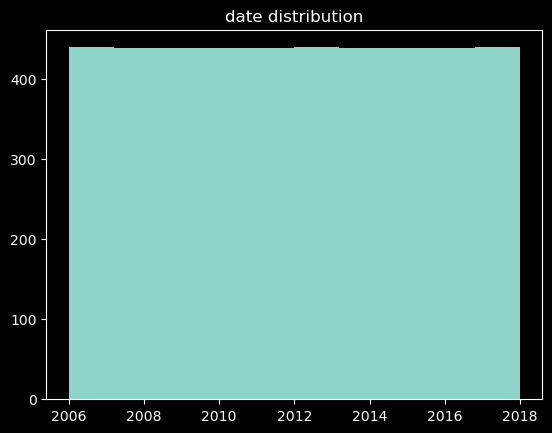

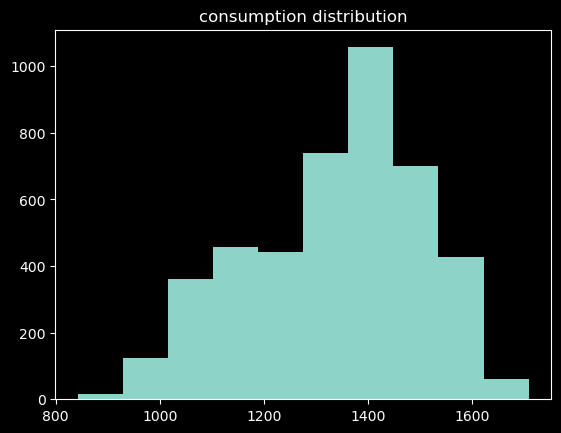

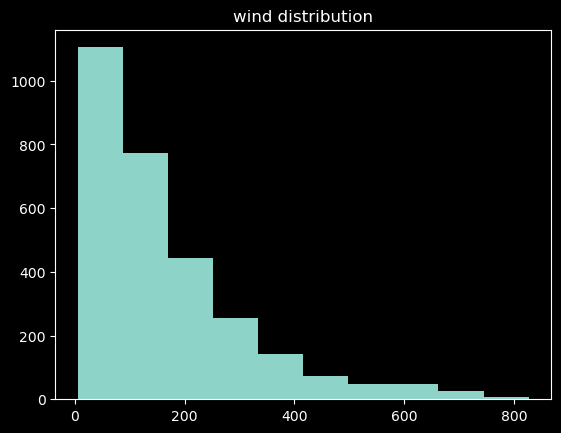

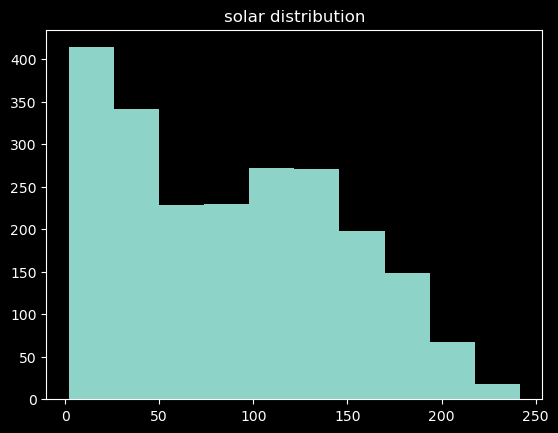

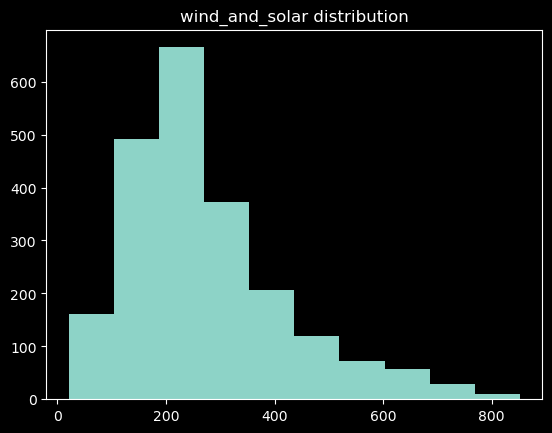

In [135]:
import matplotlib.pyplot as plt

# Hist plot for each column

for col in opsd:
    plt.hist(opsd[col])
    plt.title(f"{col} distribution")
    plt.show()

#### 3. 
Set the index to be the datetime variable.


In [136]:
opsd = opsd.set_index("date").sort_index()

#### 4. 
Add a month and a year column to your dataframe.


In [137]:
# Add a month column
opsd["month"] = opsd.index.month

# Add a year column
opsd["year"] = opsd.index.year

In [138]:
opsd

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,2006
2006-01-02,1380.52100,NaN,NaN,NaN,1,2006
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006
2006-01-04,1457.21700,NaN,NaN,NaN,1,2006
2006-01-05,1477.13100,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


#### 5. 
Fill any missing values.


Total rows: 4383
Total columns: 6


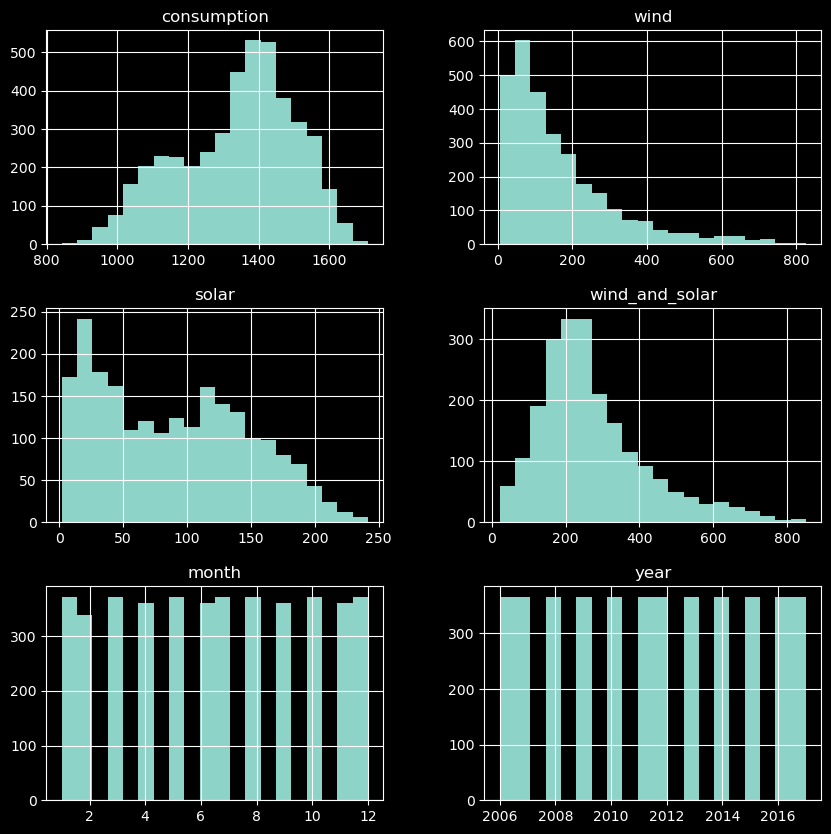

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,consumption,float64,4374,0,0.00000,"[1069.1840000000002, 1380.5210000000002, 1442....","[842.395, 1709.5679999999998, 1338.6758355897787]"
1,wind,float64,2913,1461,0.33333,"[nan, 48.709, 24.628000000000004, 22.963, 59.3...","[5.756999999999999, 826.2779999999999, 164.884..."
2,solar,float64,2185,2191,0.49989,"[nan, 6.587, 6.574000000000001, 24.679, 14.681...","[1.968, 241.57999999999996, 89.26547627737226]"
3,wind_and_solar,float64,2186,2191,0.49989,"[nan, 234.05200000000005, 213.901, 498.147, 51...","[21.478, 851.556, 272.4611829379562]"
4,month,int32,12,0,0.00000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",None
5,year,int32,12,0,0.00000,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...",None


In [142]:
check_columns(opsd, graphs=True)

In [146]:
opsd

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,2006
2006-01-02,1380.52100,NaN,NaN,NaN,1,2006
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006
2006-01-04,1457.21700,NaN,NaN,NaN,1,2006
2006-01-05,1477.13100,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [147]:
opsd.groupby("year").sum()

,consumption,wind,solar,wind_and_solar,month
year,,,,,
2006,489068.53600,0.000,0.000,0.000,2382
2007,496631.84700,0.000,0.000,0.000,2382
2008,495570.87600,0.000,0.000,0.000,2384
2009,459737.42800,0.000,0.000,0.000,2382
2010,488588.70000,35911.777,0.000,0.000,2382
2011,484814.08600,44454.081,0.000,0.000,2382
2012,469574.75400,45862.667,27887.332,73749.999,2384
2013,463336.85300,47197.832,29688.490,76902.091,2382
2014,504164.82100,51220.871,32741.497,84085.733,2382


In [148]:
# Find the nulls in wind

opsd[opsd["wind"].isna()].value_counts("year")

year
2008    366
2006    365
2007    365
2009    365
Name: count, dtype: int64

In [149]:
# Where year <2010, fill wind nulls with 0

opsd.loc[opsd["year"] < 2010, "wind"] = opsd.loc[opsd["year"] < 2010, "wind"].fillna(0)

In [150]:
# Find the nulls in solar

opsd[opsd["solar"].isna()].value_counts("year")

year
2008    366
2006    365
2007    365
2009    365
2010    365
2011    365
Name: count, dtype: int64

In [151]:
# Where year <2012, fill solar nulls with 0

opsd.loc[opsd["year"] < 2012, "solar"] = opsd.loc[opsd["year"] < 2012, "solar"].fillna(
    0
)

In [152]:
# Find nulls in wind_and_solar

opsd[opsd["wind_and_solar"].isna()].value_counts("year")

year
2008    366
2006    365
2007    365
2009    365
2010    365
2011    365
Name: count, dtype: int64

In [153]:
# Fill the nulls in wind_and_solar of 2012 and below with the wind value counts

opsd.loc[opsd["year"] < 2012, "wind_and_solar"] = opsd.loc[
    opsd["year"] < 2012, "wind_and_solar"
].fillna(opsd["wind"].value_counts().index[0])

In [154]:
# Show me the nulls values

opsd[opsd["wind_and_solar"].isna()]

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,


In [143]:
opsd = opsd.fillna(method="ffill")

In [155]:
opsd

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [156]:
check_columns(opsd)

Total rows: 4383
Total columns: 6


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,consumption,float64,4374,0,0.0,"[1069.1840000000002, 1380.5210000000002, 1442....","[842.395, 1709.5679999999998, 1338.6758355897787]"
1,wind,float64,2914,0,0.0,"[0.0, 48.709, 24.628000000000004, 22.963, 59.3...","[0.0, 826.2779999999999, 109.92281838923111]"
2,solar,float64,2186,0,0.0,"[0.0, 6.587, 6.574000000000001, 24.679, 14.681...","[0.0, 241.57999999999996, 44.64292128678987]"
3,wind_and_solar,float64,2187,0,0.0,"[0.0, 234.05200000000005, 213.901, 498.147, 51...","[0.0, 851.556, 136.26167305498518]"
4,month,int32,12,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",None
5,year,int32,12,0,0.0,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...",None


#### 6. 
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# Define a function that takes in a dataframe and performs several cleaning operations
def prep_opsd(df):
    """
    This function takes in a dataframe and performs the following operations:
    - Makes all columns lowercase
    - Renames the 'wind+solar' column to 'wind_and_solar'
    - Converts the 'date' column to datetime format
    - Sets the 'date' column as the index and sorts the index
    - Adds a 'month' and 'year' column
    - Fills null values in 'wind' column where year < 2010 with 0
    - Fills null values in 'solar' column where year < 2012 with 0
    - Fills null values in 'wind_and_solar' column where year < 2012 with the wind value counts
    - Fills remaining null values with forward fill method

    It returns a cleaned dataframe.
    """
    # Make all column names lowercase
    df.columns = df.columns.str.lower()

    # Rename the 'wind+solar' column to 'wind_and_solar'
    df.rename(columns={"wind+solar": "wind_and_solar"}, inplace=True)

    # Convert the 'date' column to datetime format
    df["date"] = pd.to_datetime(df["date"])

    # Set the 'date' column as the index and sort the index
    df = df.set_index("date").sort_index()

    # Add a 'month' and 'year' column
    df["month"] = df.index.month
    df["year"] = df.index.year

    # Fill null values in 'wind' column where year < 2010 with 0
    df.loc[df["year"] < 2010, "wind"] = df.loc[df["year"] < 2010, "wind"].fillna(0)

    # Fill null values in 'solar' column where year < 2012 with 0
    df.loc[df["year"] < 2012, "solar"] = df.loc[df["year"] < 2012, "solar"].fillna(0)

    # Fill null values in 'wind_and_solar' column where year < 2012 with the wind value counts
    df.loc[df["year"] < 2012, "wind_and_solar"] = df.loc[
        df["year"] < 2012, "wind_and_solar"
    ].fillna(df["wind"].value_counts().index[0])

    # Fill remaining null values with forward fill method
    df = df.fillna(method="ffill")

    # Return the cleaned dataframe
    return df

## Notes

### Preparation Steps


---
### 1. Acquire

---
### 2. Summarize
- surface level exploration
---
### 3. Set DateTime index
- Convert
- Set
- Sort
---
### 4. Check for gaps
- Consistency in time gaps
- Any missing
---
### 5. Train,validate, test split
- Types of splits
    - Human based
    - Percent based
    - Cross validation